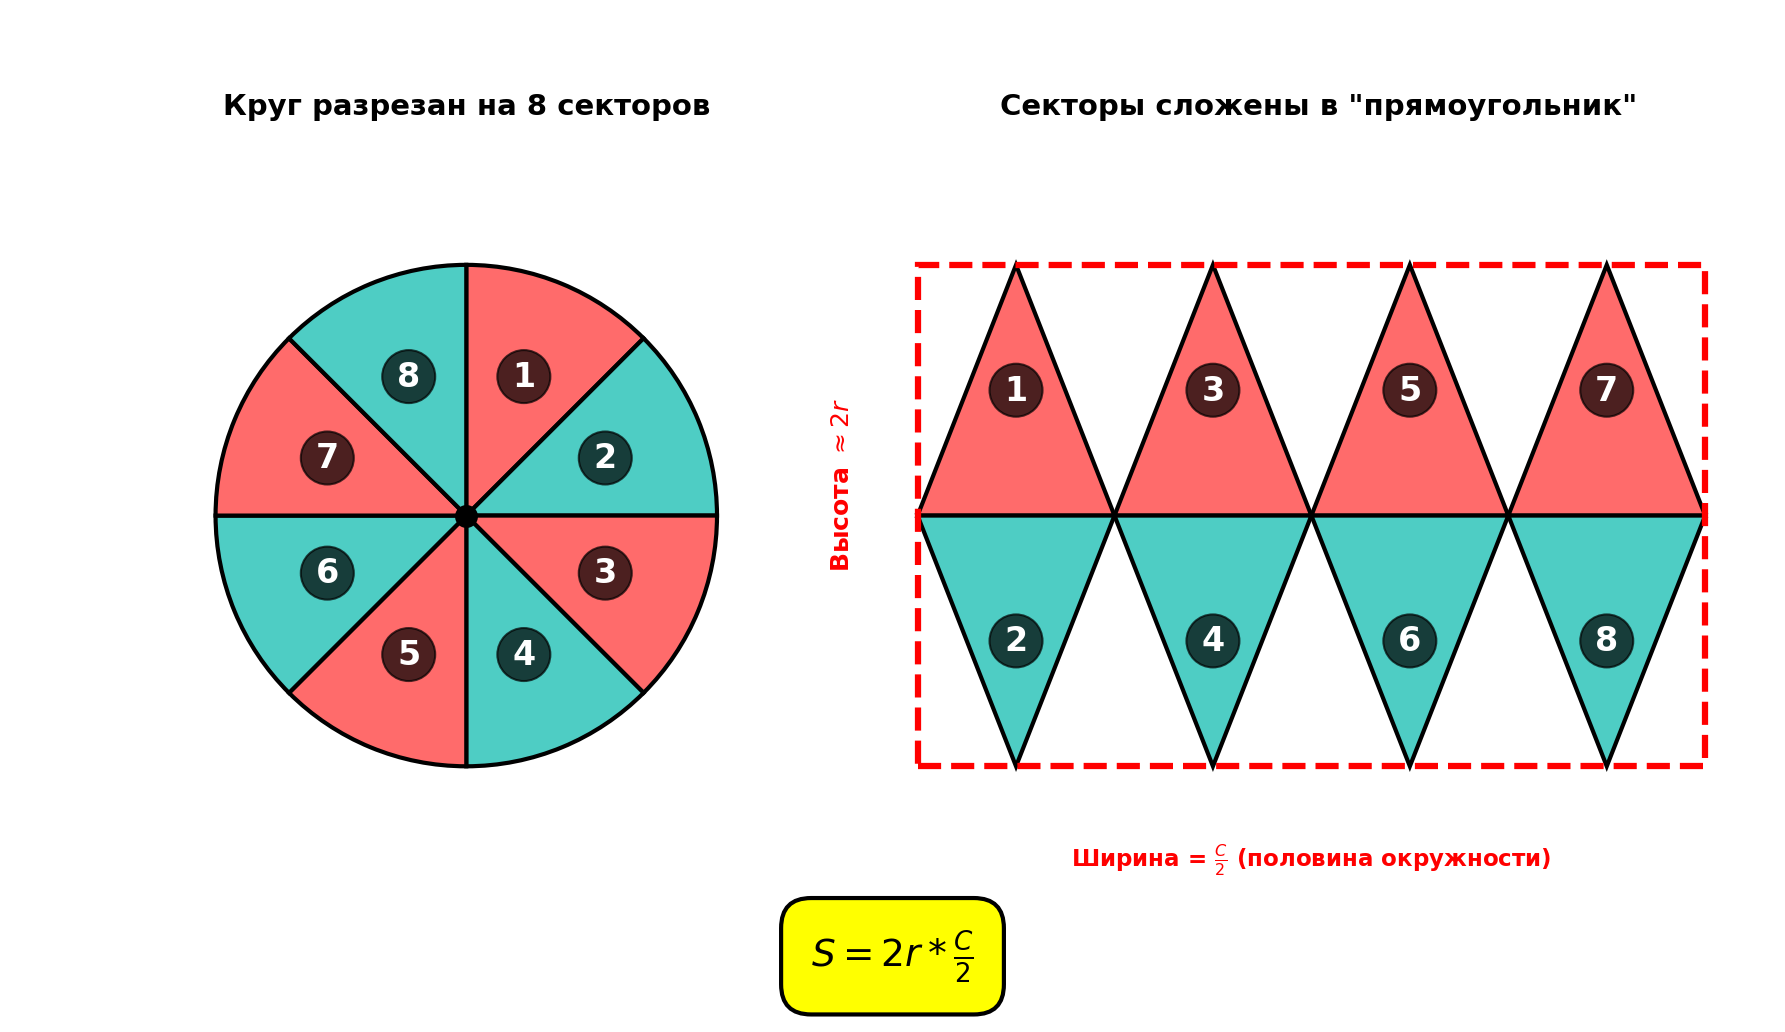

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.patches as mpatches

# Настройка для Retina дисплеев
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# Параметры
radius = 1
n_sectors = 8  # 8 секторов как пицца
colors = ['#FF6B6B' if i % 2 == 0 else '#4ECDC4' for i in range(n_sectors)]

# Создаем один график
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-1.8, 5.2)
ax.set_ylim(-2, 2)

# ========== ЛЕВАЯ ЧАСТЬ: Круг из 8 секторов ==========
circle_center = (0, 0)

# Заголовок над кругом
ax.text(0, 1.6, 'Круг разрезан на 8 секторов', ha='center', fontsize=14, weight='bold')

for i in range(n_sectors):
    # Начинаем с верха (90°) и идем по часовой стрелке (уменьшаем угол)
    theta1 = 90 - i * 360 / n_sectors
    theta2 = 90 - (i + 1) * 360 / n_sectors
    
    wedge = Wedge(circle_center, radius, theta2, theta1,  # Меняем порядок для часовой стрелки
                  facecolor=colors[i], 
                  edgecolor='black', 
                  linewidth=2)
    ax.add_patch(wedge)
    
    # Добавляем номер сектора по порядку (1, 2, 3...)
    sector_number = i + 1
    mid_theta = np.radians((theta1 + theta2) / 2)
    label_x = 0.6 * radius * np.cos(mid_theta)
    label_y = 0.6 * radius * np.sin(mid_theta)
    ax.text(label_x, label_y, str(sector_number), ha='center', va='center', 
            fontsize=16, weight='bold', color='white',
            bbox=dict(boxstyle='circle,pad=0.3', facecolor='black', alpha=0.7))

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# ========== ПРАВАЯ ЧАСТЬ: Секторы составлены в прямоугольник ==========

# Заголовок над прямоугольником
ax.text(3.4, 1.6, 'Секторы сложены в "прямоугольник"', ha='center', fontsize=14, weight='bold')

# Угол одного сектора
sector_angle = 2 * np.pi / n_sectors
x_offset = 1.8  # Начало правой части (ближе к кругу)

# Располагаем секторы: четные вверху, нечетные внизу МЕЖДУ четными
half = n_sectors // 2
color_red = '#FF6B6B'
color_cyan = '#4ECDC4'
y_offset = 0
arc_length = sector_angle * radius

# Верхний ряд - четные секторы (2, 4, 6, 8)
x_offset_top = 1.8
for i in range(half):
    # Простой треугольник: основание на y=0, вершина вверху
    xs = np.array([x_offset_top, x_offset_top + arc_length, x_offset_top + arc_length/2])
    ys = np.array([y_offset, y_offset, y_offset + radius])
    
    polygon = mpatches.Polygon(np.column_stack([xs, ys]), 
                              facecolor=color_red, 
                              edgecolor='black', 
                              linewidth=2)
    ax.add_patch(polygon)
    
    # Номер нечетного сектора (1, 3, 5, 7)
    sector_number = i * 2 + 1
    label_x = x_offset_top + arc_length/2
    label_y = y_offset + radius * 0.5
    ax.text(label_x, label_y, str(sector_number), ha='center', va='center', 
            fontsize=16, weight='bold', color='white',
            bbox=dict(boxstyle='circle,pad=0.3', facecolor='black', alpha=0.7))
    
    x_offset_top += arc_length

# Нижний ряд - четные секторы (2, 4, 6, 8) - ТРЕУГОЛЬНИКИ
x_offset_bottom = 1.8  # Без сдвига
for i in range(half):
    # Простой треугольник: основание на y=0, вершина внизу
    xs = np.array([x_offset_bottom, x_offset_bottom + arc_length, x_offset_bottom + arc_length/2])
    ys = np.array([y_offset, y_offset, y_offset - radius])
    
    polygon = mpatches.Polygon(np.column_stack([xs, ys]), 
                              facecolor=color_cyan, 
                              edgecolor='black', 
                              linewidth=2)
    ax.add_patch(polygon)
    
    # Номер четного сектора (2, 4, 6, 8)
    sector_number = (i + 1) * 2
    label_x = x_offset_bottom + arc_length/2
    label_y = y_offset - radius * 0.5
    ax.text(label_x, label_y, str(sector_number), ha='center', va='center', 
            fontsize=16, weight='bold', color='white',
            bbox=dict(boxstyle='circle,pad=0.3', facecolor='black', alpha=0.7))
    
    x_offset_bottom += arc_length

# Рисуем пунктирный прямоугольник вокруг
rect_x = 1.8
rect_y = -radius
rect_width = np.pi
rect_height = 2 * radius

rect_outline = mpatches.Rectangle((rect_x, rect_y), rect_width, rect_height,
                                 fill=False,
                                 edgecolor='red',
                                 linewidth=3,
                                 linestyle='--')
ax.add_patch(rect_outline)

# Подписи размеров
ax.text(rect_x + rect_width/2, -1.4, r'Ширина = $\frac{C}{2}$ (половина окружности)', 
        ha='center', fontsize=11, color='red', weight='bold')
ax.text(rect_x - 0.3, -0.2, r'Высота $\approx 2r$', 
        ha='center', fontsize=12, color='red', weight='bold', rotation=90)

# Формула внизу
ax.text(1.7, -1.8, r'$S = 2r * \frac{C}{2}$', 
        ha='center', fontsize=18, weight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', 
                 edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()


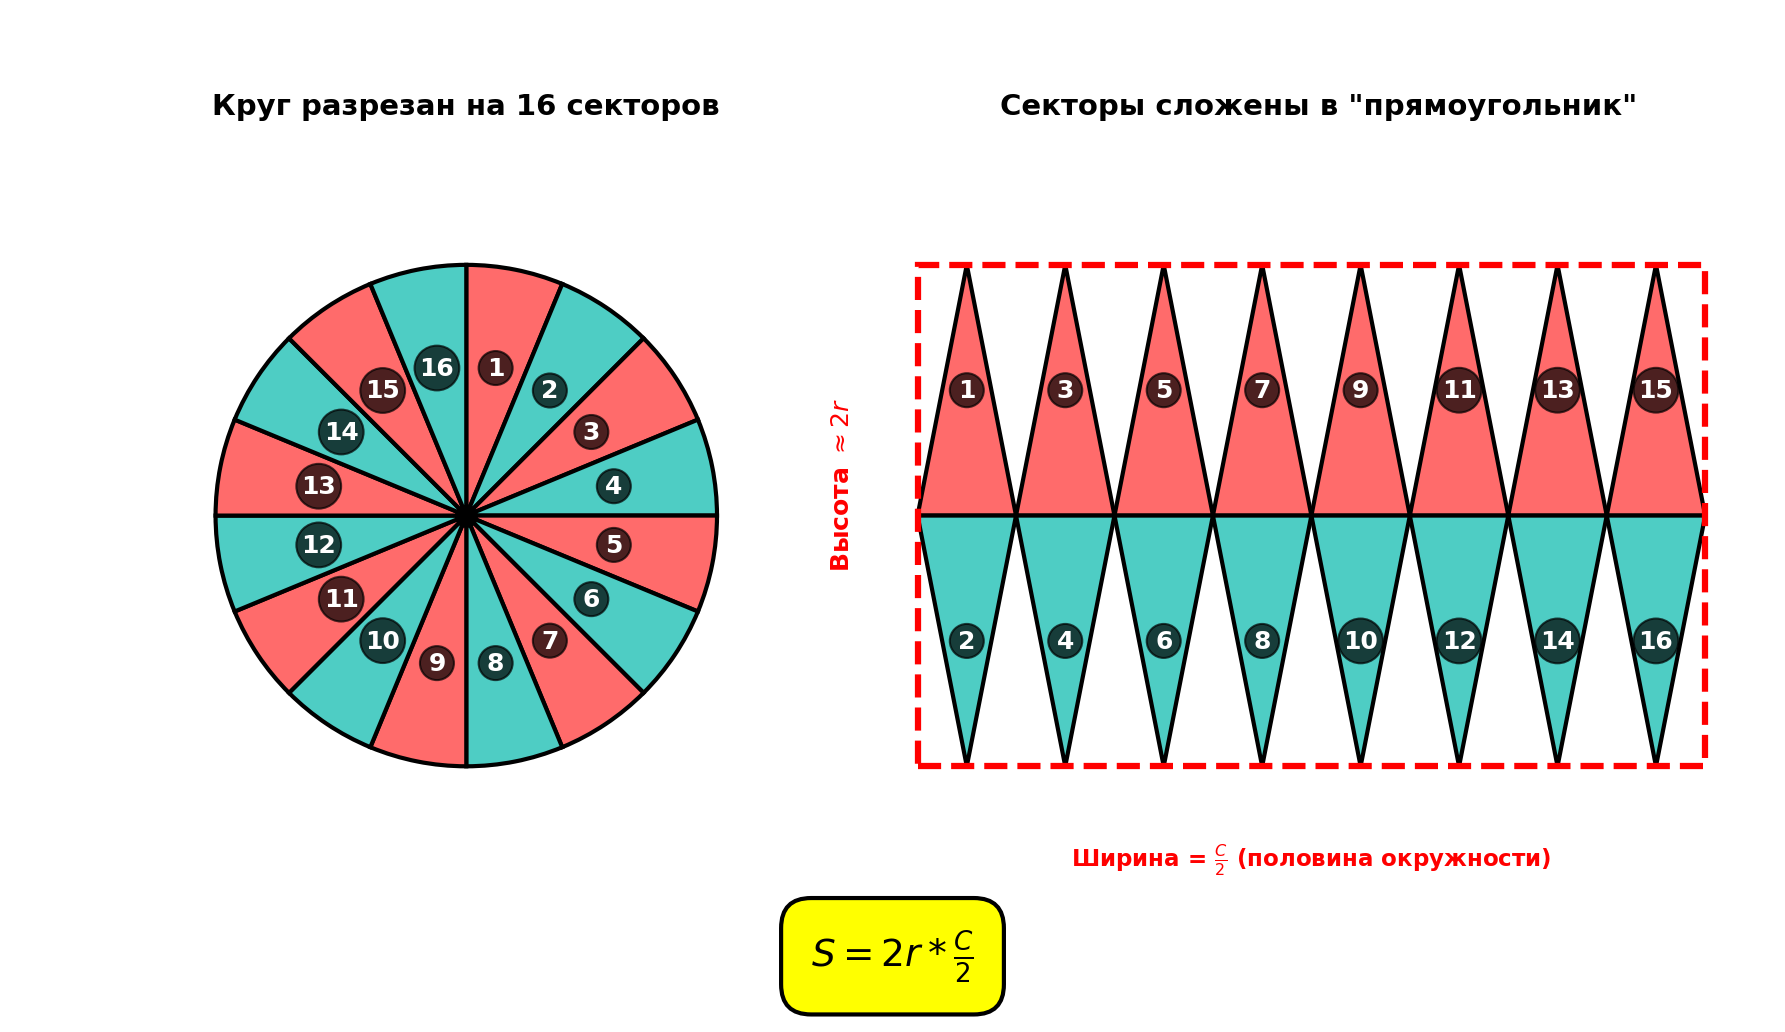

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.patches as mpatches

# Настройка для Retina дисплеев
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# Параметры для 16 секторов
radius = 1
n_sectors = 16  # 16 секторов
colors = ['#FF6B6B' if i % 2 == 0 else '#4ECDC4' for i in range(n_sectors)]

# Создаем один график
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-1.8, 5.2)
ax.set_ylim(-2, 2)

# ========== ЛЕВАЯ ЧАСТЬ: Круг из 16 секторов ==========
circle_center = (0, 0)

# Заголовок над кругом
ax.text(0, 1.6, 'Круг разрезан на 16 секторов', ha='center', fontsize=14, weight='bold')

for i in range(n_sectors):
    # Начинаем с верха (90°) и идем по часовой стрелке (уменьшаем угол)
    theta1 = 90 - i * 360 / n_sectors
    theta2 = 90 - (i + 1) * 360 / n_sectors
    
    wedge = Wedge(circle_center, radius, theta2, theta1,  # Меняем порядок для часовой стрелки
                  facecolor=colors[i], 
                  edgecolor='black', 
                  linewidth=2)
    ax.add_patch(wedge)
    
    # Добавляем номер сектора по порядку (1, 2, 3...)
    sector_number = i + 1
    mid_theta = np.radians((theta1 + theta2) / 2)
    label_x = 0.6 * radius * np.cos(mid_theta)
    label_y = 0.6 * radius * np.sin(mid_theta)
    ax.text(label_x, label_y, str(sector_number), ha='center', va='center', 
            fontsize=12, weight='bold', color='white',
            bbox=dict(boxstyle='circle,pad=0.2', facecolor='black', alpha=0.7))

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# ========== ПРАВАЯ ЧАСТЬ: Секторы составлены в прямоугольник ==========

# Заголовок над прямоугольником
ax.text(3.4, 1.6, 'Секторы сложены в "прямоугольник"', ha='center', fontsize=14, weight='bold')

# Угол одного сектора
sector_angle = 2 * np.pi / n_sectors
x_offset = 1.8  # Начало правой части (ближе к кругу)

# Располагаем секторы: нечетные вверху, четные внизу
half = n_sectors // 2
color_red = '#FF6B6B'
color_cyan = '#4ECDC4'
y_offset = 0
arc_length = sector_angle * radius

# Верхний ряд - нечетные секторы (1, 3, 5, 7, 9, 11, 13, 15)
x_offset_top = 1.8
for i in range(half):
    # Простой треугольник: основание на y=0, вершина вверху
    xs = np.array([x_offset_top, x_offset_top + arc_length, x_offset_top + arc_length/2])
    ys = np.array([y_offset, y_offset, y_offset + radius])
    
    polygon = mpatches.Polygon(np.column_stack([xs, ys]), 
                              facecolor=color_red, 
                              edgecolor='black', 
                              linewidth=2)
    ax.add_patch(polygon)
    
    # Номер нечетного сектора
    sector_number = i * 2 + 1
    label_x = x_offset_top + arc_length/2
    label_y = y_offset + radius * 0.5
    ax.text(label_x, label_y, str(sector_number), ha='center', va='center', 
            fontsize=12, weight='bold', color='white',
            bbox=dict(boxstyle='circle,pad=0.2', facecolor='black', alpha=0.7))
    
    x_offset_top += arc_length

# Нижний ряд - четные секторы (2, 4, 6, 8, 10, 12, 14, 16)
x_offset_bottom = 1.8  # Без сдвига
for i in range(half):
    # Простой треугольник: основание на y=0, вершина внизу
    xs = np.array([x_offset_bottom, x_offset_bottom + arc_length, x_offset_bottom + arc_length/2])
    ys = np.array([y_offset, y_offset, y_offset - radius])
    
    polygon = mpatches.Polygon(np.column_stack([xs, ys]), 
                              facecolor=color_cyan, 
                              edgecolor='black', 
                              linewidth=2)
    ax.add_patch(polygon)
    
    # Номер четного сектора
    sector_number = (i + 1) * 2
    label_x = x_offset_bottom + arc_length/2
    label_y = y_offset - radius * 0.5
    ax.text(label_x, label_y, str(sector_number), ha='center', va='center', 
            fontsize=12, weight='bold', color='white',
            bbox=dict(boxstyle='circle,pad=0.2', facecolor='black', alpha=0.7))
    
    x_offset_bottom += arc_length

# Рисуем пунктирный прямоугольник вокруг
rect_x = 1.8
rect_y = -radius
rect_width = np.pi
rect_height = 2 * radius

rect_outline = mpatches.Rectangle((rect_x, rect_y), rect_width, rect_height,
                                 fill=False,
                                 edgecolor='red',
                                 linewidth=3,
                                 linestyle='--')
ax.add_patch(rect_outline)

# Подписи размеров
ax.text(rect_x + rect_width/2, -1.4, r'Ширина = $\frac{C}{2}$ (половина окружности)', 
        ha='center', fontsize=11, color='red', weight='bold')
ax.text(rect_x - 0.3, -0.2, r'Высота $\approx 2r$', 
        ha='center', fontsize=12, color='red', weight='bold', rotation=90)

# Формула внизу
ax.text(1.7, -1.8, r'$S = 2r * \frac{C}{2}$', 
        ha='center', fontsize=18, weight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', 
                 edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()


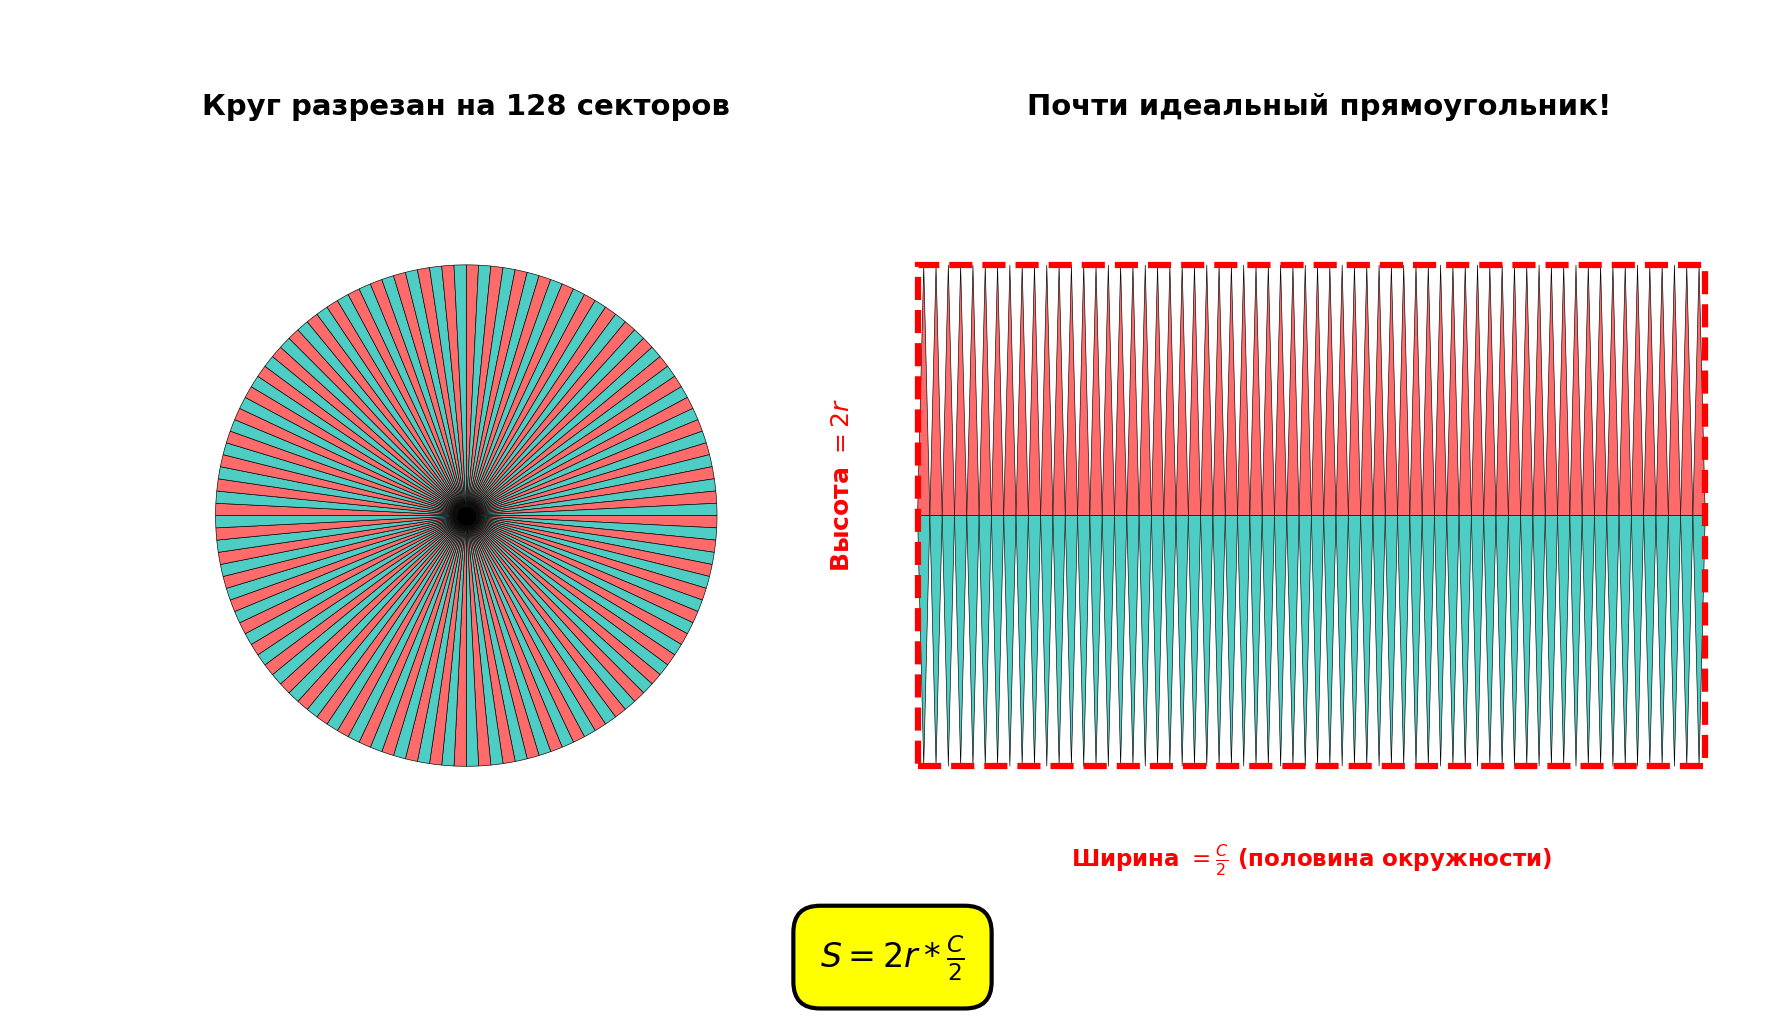

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.patches as mpatches

# Настройка для Retina дисплеев
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# Параметры для 128 секторов
radius = 1
n_sectors = 128  # 128 секторов - почти гладкое приближение
colors = ['#FF6B6B' if i % 2 == 0 else '#4ECDC4' for i in range(n_sectors)]

# Создаем один график
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-1.8, 5.2)
ax.set_ylim(-2, 2)

# ========== ЛЕВАЯ ЧАСТЬ: Круг из 128 секторов ==========
circle_center = (0, 0)

# Заголовок над кругом
ax.text(0, 1.6, 'Круг разрезан на 128 секторов', ha='center', fontsize=14, weight='bold')

for i in range(n_sectors):
    # Начинаем с верха (90°) и идем по часовой стрелке
    theta1 = 90 - i * 360 / n_sectors
    theta2 = 90 - (i + 1) * 360 / n_sectors
    
    wedge = Wedge(circle_center, radius, theta2, theta1,
                  facecolor=colors[i], 
                  edgecolor='black', 
                  linewidth=0.3)  # Тонкая обводка
    ax.add_patch(wedge)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=8, zorder=5)

# ========== ПРАВАЯ ЧАСТЬ: Секторы составлены в прямоугольник ==========

# Заголовок над прямоугольником
ax.text(3.4, 1.6, 'Почти идеальный прямоугольник!', ha='center', fontsize=14, weight='bold')

# Угол одного сектора
sector_angle = 2 * np.pi / n_sectors
x_offset = 1.8

# Располагаем секторы: нечетные вверху, четные внизу
half = n_sectors // 2
color_red = '#FF6B6B'
color_cyan = '#4ECDC4'
y_offset = 0
arc_length = sector_angle * radius

# Верхний ряд - нечетные секторы
x_offset_top = 1.8
for i in range(half):
    # Простой треугольник: основание на y=0, вершина вверху
    xs = np.array([x_offset_top, x_offset_top + arc_length, x_offset_top + arc_length/2])
    ys = np.array([y_offset, y_offset, y_offset + radius])
    
    polygon = mpatches.Polygon(np.column_stack([xs, ys]), 
                              facecolor=color_red, 
                              edgecolor='black', 
                              linewidth=0.3)  # Тонкая обводка
    ax.add_patch(polygon)
    
    x_offset_top += arc_length

# Нижний ряд - четные секторы
x_offset_bottom = 1.8
for i in range(half):
    # Простой треугольник: основание на y=0, вершина внизу
    xs = np.array([x_offset_bottom, x_offset_bottom + arc_length, x_offset_bottom + arc_length/2])
    ys = np.array([y_offset, y_offset, y_offset - radius])
    
    polygon = mpatches.Polygon(np.column_stack([xs, ys]), 
                              facecolor=color_cyan, 
                              edgecolor='black', 
                              linewidth=0.3)  # Тонкая обводка
    ax.add_patch(polygon)
    
    x_offset_bottom += arc_length

# Рисуем пунктирный прямоугольник вокруг
rect_x = 1.8
rect_y = -radius
rect_width = np.pi
rect_height = 2 * radius

rect_outline = mpatches.Rectangle((rect_x, rect_y), rect_width, rect_height,
                                 fill=False,
                                 edgecolor='red',
                                 linewidth=3,
                                 linestyle='--')
ax.add_patch(rect_outline)

# Подписи размеров
ax.text(rect_x + rect_width/2, -1.4, r'Ширина $= \frac{C}{2}$ (половина окружности)', 
        ha='center', fontsize=11, color='red', weight='bold')
ax.text(rect_x - 0.3, -0.2, r'Высота $= 2r$', 
        ha='center', fontsize=12, color='red', weight='bold', rotation=90)

# Формула внизу с пояснением
ax.text(1.7, -1.8, r'$S = 2r * \frac{C}{2}$', 
        ha='center', fontsize=16, weight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', 
                 edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()


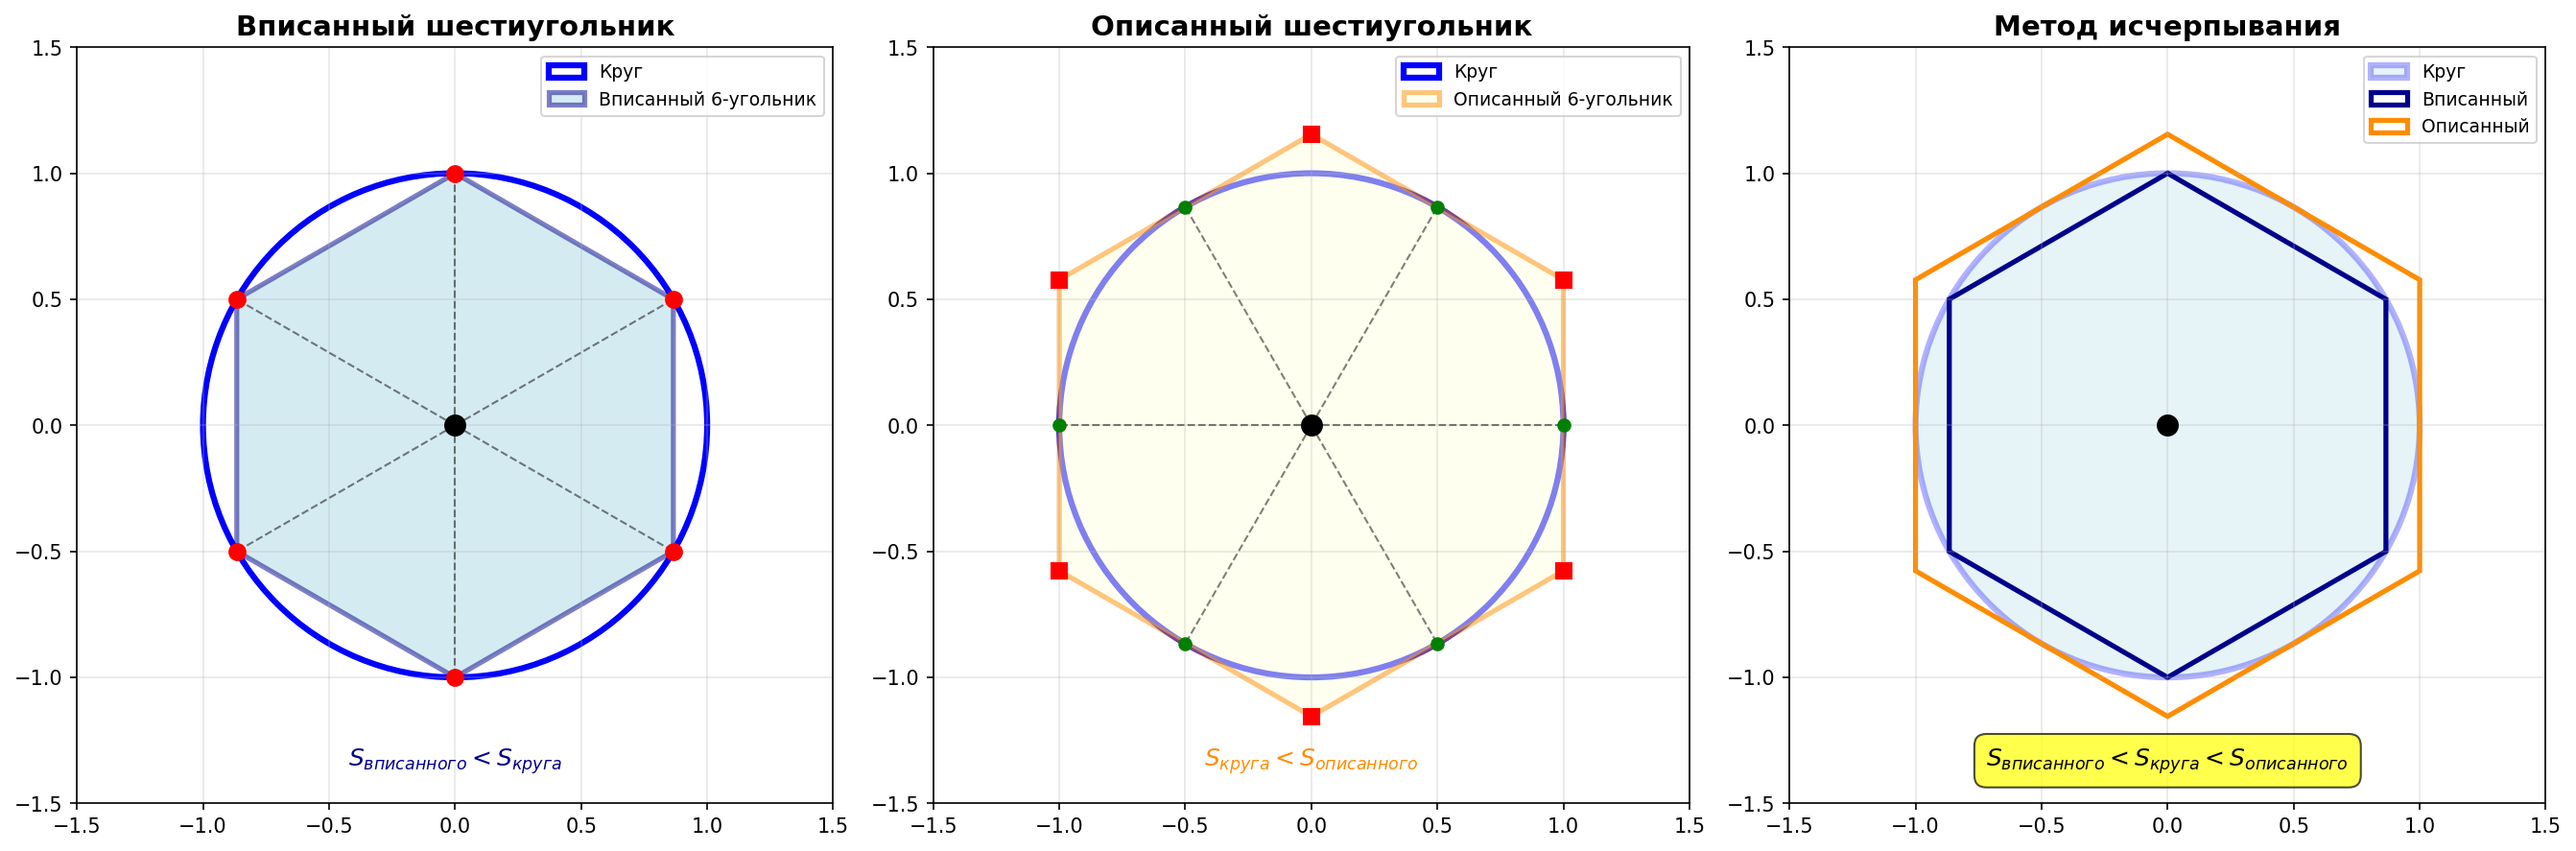

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Настройка для Retina дисплеев
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# Создаем фигуру с тремя подграфиками
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

radius = 1
n_sides = 6  # Шестиугольник

# ========== График 1: Вписанный шестиугольник ==========
ax = axes[0]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Вписанный шестиугольник', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=False, edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Рисуем вписанный шестиугольник
angles_inscribed = np.linspace(90, 90 + 360, n_sides + 1) * np.pi / 180
x_inscribed = radius * np.cos(angles_inscribed)
y_inscribed = radius * np.sin(angles_inscribed)

polygon_inscribed = mpatches.Polygon(np.column_stack([x_inscribed[:-1], y_inscribed[:-1]]),
                                     fill=True, facecolor='lightblue', alpha=0.5,
                                     edgecolor='darkblue', linewidth=2.5,
                                     label='Вписанный 6-угольник')
ax.add_patch(polygon_inscribed)

# Рисуем радиусы к вершинам
for i in range(n_sides):
    ax.plot([0, x_inscribed[i]], [0, y_inscribed[i]], 'k--', linewidth=1, alpha=0.5)
    ax.plot(x_inscribed[i], y_inscribed[i], 'ro', markersize=8)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись
ax.text(0, -1.35, r'$S_{вписанного} < S_{круга}$', 
        ha='center', fontsize=12, weight='bold', color='darkblue')

ax.legend(loc='upper right', fontsize=9)

# ========== График 2: Описанный шестиугольник ==========
ax = axes[1]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Описанный шестиугольник', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=False, edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Рисуем описанный шестиугольник
# Расстояние от центра до стороны описанного многоугольника = radius
# Расстояние от центра до вершины = radius / cos(π/n_sides)
radius_circumscribed = radius / np.cos(np.pi / n_sides)

angles_circumscribed = np.linspace(90, 90 + 360, n_sides + 1) * np.pi / 180
x_circumscribed = radius_circumscribed * np.cos(angles_circumscribed)
y_circumscribed = radius_circumscribed * np.sin(angles_circumscribed)

polygon_circumscribed = mpatches.Polygon(np.column_stack([x_circumscribed[:-1], y_circumscribed[:-1]]),
                                         fill=True, facecolor='lightyellow', alpha=0.5,
                                         edgecolor='darkorange', linewidth=2.5,
                                         label='Описанный 6-угольник')
ax.add_patch(polygon_circumscribed)

# Рисуем радиусы к серединам сторон
for i in range(n_sides):
    mid_angle = (angles_circumscribed[i] + angles_circumscribed[i+1]) / 2
    x_mid = radius * np.cos(mid_angle)
    y_mid = radius * np.sin(mid_angle)
    ax.plot([0, x_mid], [0, y_mid], 'k--', linewidth=1, alpha=0.5)
    ax.plot(x_mid, y_mid, 'go', markersize=6)

# Вершины описанного многоугольника
for i in range(n_sides):
    ax.plot(x_circumscribed[i], y_circumscribed[i], 'rs', markersize=8)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись
ax.text(0, -1.35, r'$S_{круга} < S_{описанного}$', 
        ha='center', fontsize=12, weight='bold', color='darkorange')

ax.legend(loc='upper right', fontsize=9)

# ========== График 3: Оба многоугольника вместе ==========
ax = axes[2]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Метод исчерпывания', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=True, facecolor='lightblue', alpha=0.3,
                    edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Вписанный многоугольник
polygon_inscribed = mpatches.Polygon(np.column_stack([x_inscribed[:-1], y_inscribed[:-1]]),
                                     fill=False,
                                     edgecolor='darkblue', linewidth=2.5,
                                     label='Вписанный')
ax.add_patch(polygon_inscribed)

# Описанный многоугольник
polygon_circumscribed = mpatches.Polygon(np.column_stack([x_circumscribed[:-1], y_circumscribed[:-1]]),
                                         fill=False,
                                         edgecolor='darkorange', linewidth=2.5,
                                         label='Описанный')
ax.add_patch(polygon_circumscribed)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись с формулой
ax.text(0, -1.35, r'$S_{вписанного} < S_{круга} < S_{описанного}$', 
        ha='center', fontsize=12, weight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

ax.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()


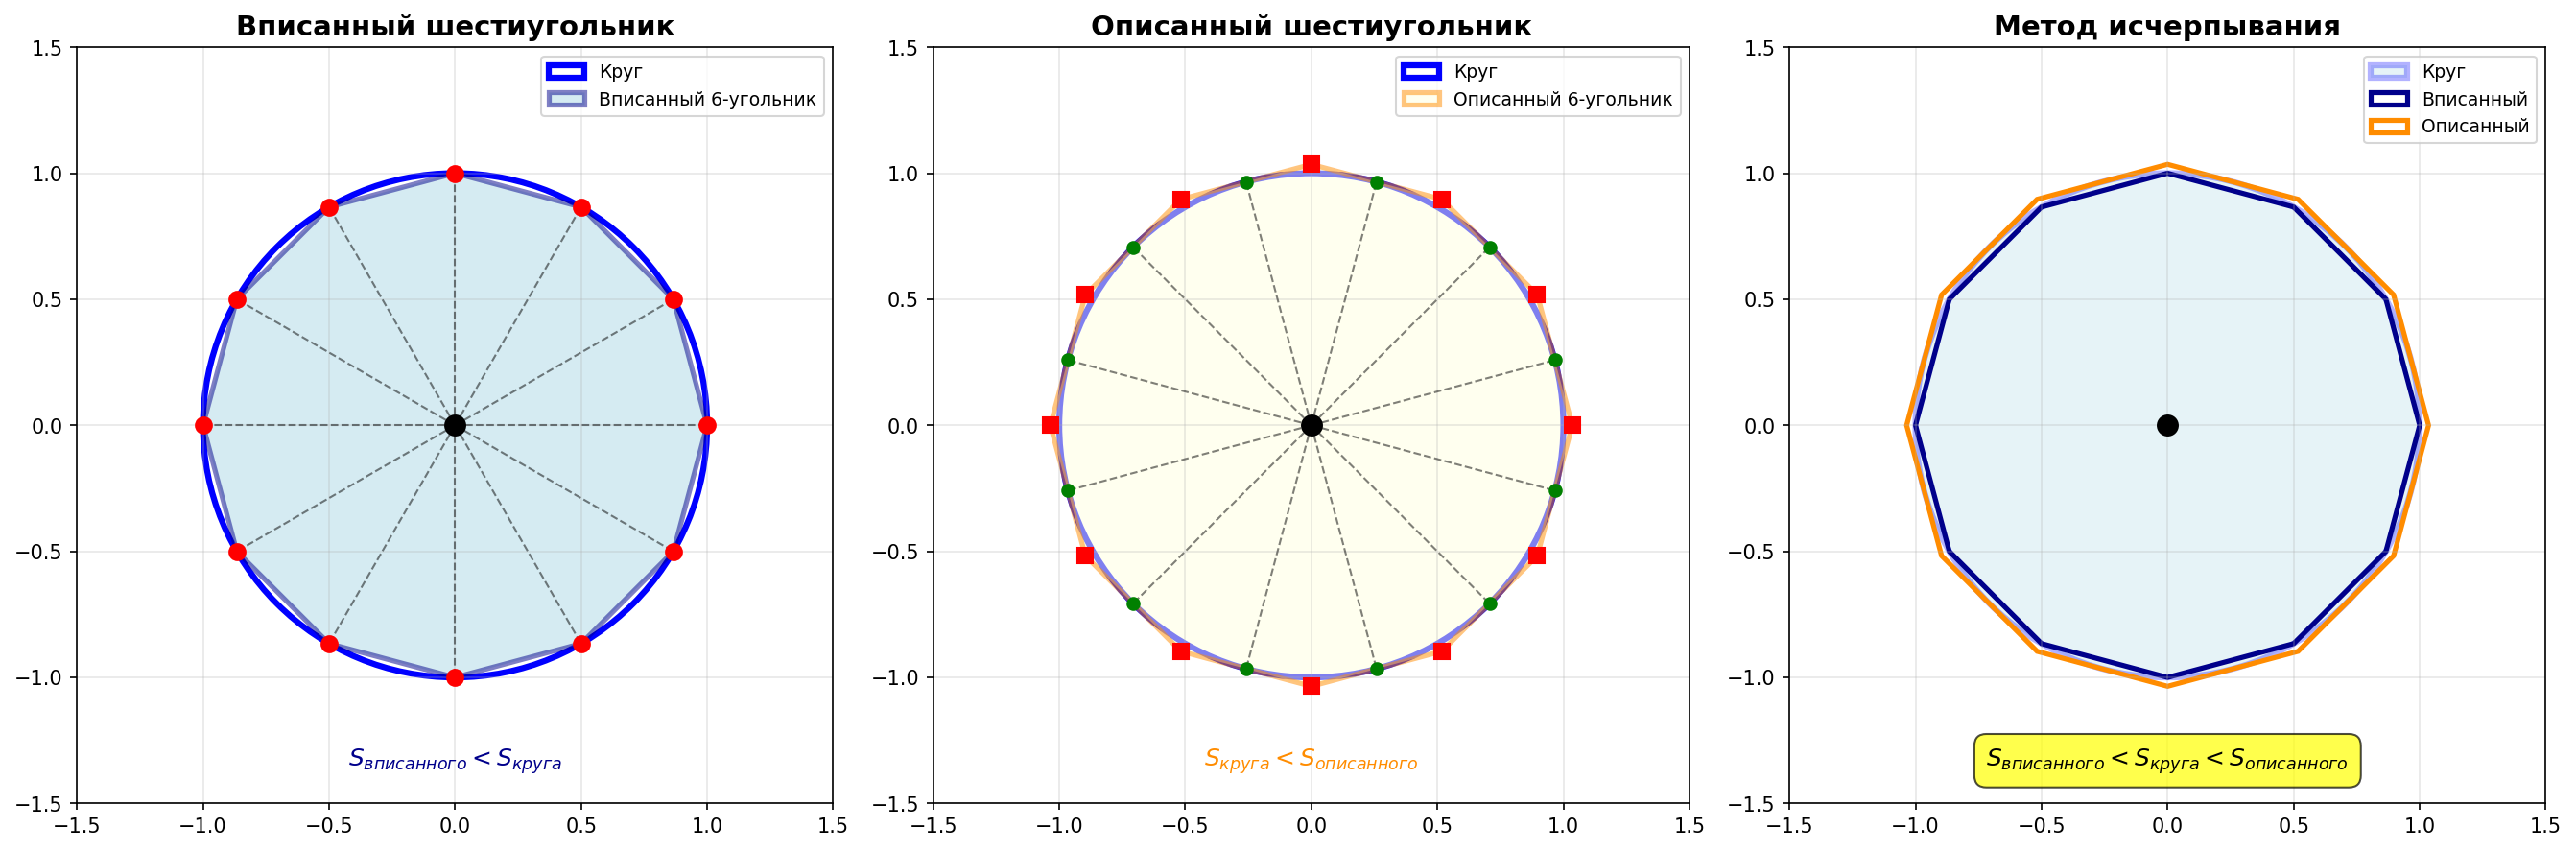

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Настройка для Retina дисплеев
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# Создаем фигуру с тремя подграфиками
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

radius = 1
n_sides = 12  # Шестиугольник

# ========== График 1: Вписанный шестиугольник ==========
ax = axes[0]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Вписанный шестиугольник', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=False, edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Рисуем вписанный шестиугольник
angles_inscribed = np.linspace(90, 90 + 360, n_sides + 1) * np.pi / 180
x_inscribed = radius * np.cos(angles_inscribed)
y_inscribed = radius * np.sin(angles_inscribed)

polygon_inscribed = mpatches.Polygon(np.column_stack([x_inscribed[:-1], y_inscribed[:-1]]),
                                     fill=True, facecolor='lightblue', alpha=0.5,
                                     edgecolor='darkblue', linewidth=2.5,
                                     label='Вписанный 6-угольник')
ax.add_patch(polygon_inscribed)

# Рисуем радиусы к вершинам
for i in range(n_sides):
    ax.plot([0, x_inscribed[i]], [0, y_inscribed[i]], 'k--', linewidth=1, alpha=0.5)
    ax.plot(x_inscribed[i], y_inscribed[i], 'ro', markersize=8)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись
ax.text(0, -1.35, r'$S_{вписанного} < S_{круга}$', 
        ha='center', fontsize=12, weight='bold', color='darkblue')

ax.legend(loc='upper right', fontsize=9)

# ========== График 2: Описанный шестиугольник ==========
ax = axes[1]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Описанный шестиугольник', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=False, edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Рисуем описанный шестиугольник
# Расстояние от центра до стороны описанного многоугольника = radius
# Расстояние от центра до вершины = radius / cos(π/n_sides)
radius_circumscribed = radius / np.cos(np.pi / n_sides)

angles_circumscribed = np.linspace(90, 90 + 360, n_sides + 1) * np.pi / 180
x_circumscribed = radius_circumscribed * np.cos(angles_circumscribed)
y_circumscribed = radius_circumscribed * np.sin(angles_circumscribed)

polygon_circumscribed = mpatches.Polygon(np.column_stack([x_circumscribed[:-1], y_circumscribed[:-1]]),
                                         fill=True, facecolor='lightyellow', alpha=0.5,
                                         edgecolor='darkorange', linewidth=2.5,
                                         label='Описанный 6-угольник')
ax.add_patch(polygon_circumscribed)

# Рисуем радиусы к серединам сторон
for i in range(n_sides):
    mid_angle = (angles_circumscribed[i] + angles_circumscribed[i+1]) / 2
    x_mid = radius * np.cos(mid_angle)
    y_mid = radius * np.sin(mid_angle)
    ax.plot([0, x_mid], [0, y_mid], 'k--', linewidth=1, alpha=0.5)
    ax.plot(x_mid, y_mid, 'go', markersize=6)

# Вершины описанного многоугольника
for i in range(n_sides):
    ax.plot(x_circumscribed[i], y_circumscribed[i], 'rs', markersize=8)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись
ax.text(0, -1.35, r'$S_{круга} < S_{описанного}$', 
        ha='center', fontsize=12, weight='bold', color='darkorange')

ax.legend(loc='upper right', fontsize=9)

# ========== График 3: Оба многоугольника вместе ==========
ax = axes[2]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Метод исчерпывания', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=True, facecolor='lightblue', alpha=0.3,
                    edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Вписанный многоугольник
polygon_inscribed = mpatches.Polygon(np.column_stack([x_inscribed[:-1], y_inscribed[:-1]]),
                                     fill=False,
                                     edgecolor='darkblue', linewidth=2.5,
                                     label='Вписанный')
ax.add_patch(polygon_inscribed)

# Описанный многоугольник
polygon_circumscribed = mpatches.Polygon(np.column_stack([x_circumscribed[:-1], y_circumscribed[:-1]]),
                                         fill=False,
                                         edgecolor='darkorange', linewidth=2.5,
                                         label='Описанный')
ax.add_patch(polygon_circumscribed)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись с формулой
ax.text(0, -1.35, r'$S_{вписанного} < S_{круга} < S_{описанного}$', 
        ha='center', fontsize=12, weight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

ax.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()
